In [2]:
import os
import qiskit

from qiskit import *

from qiskit_aer import Aer
from qiskit_aer import *

from qiskit.visualization import *

In [15]:
qiskit.__version__

'1.0.0'

In [3]:
q=QuantumRegister(2)
c=ClassicalRegister(2)
bell = QuantumCircuit(q,c)
bell.h(q[0])
bell.cx(q[0],q[1])
bell.barrier()

bell.x(q[0])
bell.id(q[1])

bell.measure(q, c)

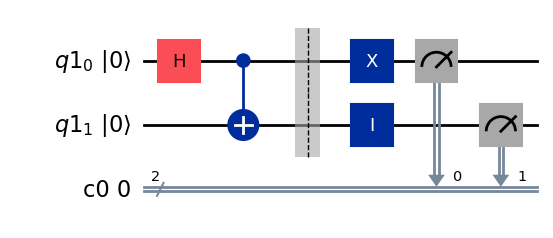

In [6]:
bell.draw("mpl", initial_state=True)

# Running on a simulator

In [10]:

# Transpile for simulator
simulator = Aer.get_backend('qasm_simulator')
tmp = transpile(bell, simulator)

# Run and get counts
result = simulator.run(tmp, shots=1000).result()
counts_sim = result.get_counts(bell)
print(counts_sim)

{'10': 472, '01': 528}


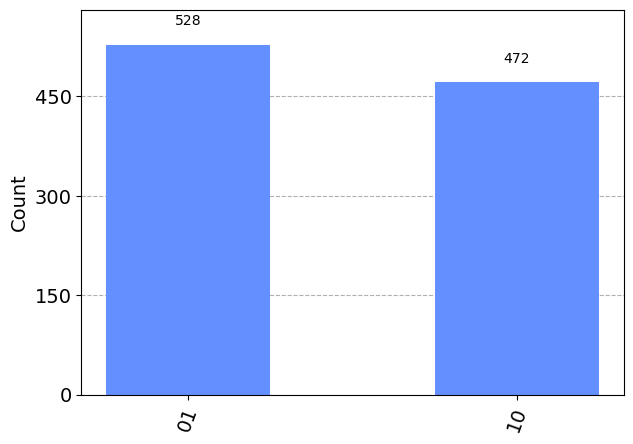

In [11]:
plot_histogram(counts_sim)

# Running On Real Device

In [12]:
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit_ibm_runtime import le

In [13]:
with open(os.path.expanduser('~')+"/Documents/keys/ibm-token.txt") as f:
    # Newline character must be excluded
    IBM_token = f.readline()[:-1]

In [14]:
service = QiskitRuntimeService(channel="ibm_quantum", token=IBM_token)
print(service.backends)
backend=service.least_busy(operational=True, simulator=False)
bell_ibm=transpile(bell, backend=backend)

### Don't run the following cell if you just want to retrieve the results from a previous run

In [ ]:
job_exp = backend.run(bell_ibm, shots=1024)
jobid = job_exp.job_id()
print(jobid)

### At this point you'll probably have to wait. 20min, an hour or 24 hours. You can get the resutls using jobid later on

In [ ]:
# Alternative:
job_exp = backend.service.job(jobid)

In [ ]:

result_exp = job_exp.result()
counts_exp = result_exp.get_counts(bell_ibm)
print(counts_exp)

In [ ]:
plot_histogram(counts_exp)